In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tsgm
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import LSTM, Dense




2024-02-17 20:25:42.354740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from sklearn.utils import resample
from sklearn.utils import shuffle


In [6]:
df = pd.read_csv("TestDataCompiled.csv")
df.columns = ['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade", "Normal"]
display(df)
df["Normal"].value_counts()



,AmplitudePrimary,AmplitudeSecondary,Latency,CorrectiveSaccade,Normal
0,7.905335,0.907229,0.124998,7,0
1,17.381435,0.563108,0.341670,13,0
2,29.415535,1.097195,0.308346,16,0
3,10.173487,1.182019,0.175026,9,0
4,6.801426,7.733378,0.391700,28,0
...,...,...,...,...,...
187,3.948713,3.948713,0.033335,16,1
188,14.329194,3.160185,0.125025,6,1
189,19.042962,3.035957,0.525034,5,1
190,1.762336,2.942543,0.325038,15,1


Normal
0    137
1     55
Name: count, dtype: int64

# No Data Augmentation

In [7]:
y = df.Normal
X = df.drop('Normal', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Logsitic Regression

In [8]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        28
           1       0.50      0.09      0.15        11

    accuracy                           0.72        39
   macro avg       0.61      0.53      0.49        39
weighted avg       0.66      0.72      0.64        39



In [11]:
display(y_pred)
display(y_test)
print(len(y_pred))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

141    1
21     0
118    0
63     0
139    1
99     0
145    1
92     0
2      0
128    0
29     0
37     0
52     0
126    0
32     0
71     0
116    0
74     0
102    0
131    0
103    0
163    1
23     0
107    0
173    1
14     0
136    0
1      0
106    0
87     0
59     0
183    1
150    1
20     0
189    1
121    0
162    1
137    1
175    1
Name: Normal, dtype: int64

39


### Random Forest

In [16]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 300, min_samples_leaf = 4, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.67      0.36      0.47        11

    accuracy                           0.77        39
   macro avg       0.73      0.65      0.66        39
weighted avg       0.75      0.77      0.74        39



In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.7053763440860215


### SVM 

In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 0.1, 'gamma': 1}
Best Score: 0.7124731182795699


In [20]:
model = SVC(kernel='rbf', random_state=42, C = 0.1, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        28
           1       0.00      0.00      0.00        11

    accuracy                           0.72        39
   macro avg       0.36      0.50      0.42        39
weighted avg       0.52      0.72      0.60        39



/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### simple neural network

In [96]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
31/31 [==============================] - 1s 5ms/step - loss: 1.4888 - accuracy: 0.5820 - val_loss: 0.8936 - val_accuracy: 0.7097
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7295 - val_loss: 0.5963 - val_accuracy: 0.7742
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7049 - val_loss: 0.6013 - val_accuracy: 0.7419
Epoch 4/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7295 - val_loss: 0.5773 - val_accuracy: 0.7097
Epoch 5/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7377 - val_loss: 0.5926 - val_accuracy: 0.7097
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7295 - val_loss: 0.5878 - val_accuracy: 0.7097
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7377 - val_loss: 0.5849 - val_accuracy: 0.7097
Epoch 8/50
31/31 [==

# Data Augmentation: Gaussain Noise 

In [12]:
def add_gaussian_noise(X, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=X.shape)
    return X + noise
# Example: Adding Gaussian noise with mean=0 and std=0.1
X_with_gaussian_noise = add_gaussian_noise(X)
X_augmented = pd.concat([X, X_with_gaussian_noise])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)




### Logisitic Reg

In [13]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.62      0.23      0.33        22

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



In [15]:
display(y_pred)
display(y_test)
print(len(y_pred))
print(y_test.value_counts())

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

14     0
134    0
177    1
37     0
13     0
      ..
180    1
91     0
161    1
14     0
171    1
Name: Normal, Length: 77, dtype: int64

77
Normal
0    55
1    22
Name: count, dtype: int64


### RF

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8013749338974089


In [67]:
model = RandomForestClassifier(random_state=42, max_depth = 10, n_estimators = 300, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.87      0.59      0.70        22

    accuracy                           0.86        77
   macro avg       0.86      0.78      0.80        77
weighted avg       0.86      0.86      0.85        77



### SVM 

In [68]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.889264939185616


In [69]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.90      0.82      0.86        22

    accuracy                           0.92        77
   macro avg       0.91      0.89      0.90        77
weighted avg       0.92      0.92      0.92        77



### simple neural network

In [99]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.7556 - accuracy: 0.6571 - val_loss: 0.5756 - val_accuracy: 0.6129
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.6816 - val_loss: 0.5203 - val_accuracy: 0.7581
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7143 - val_loss: 0.5317 - val_accuracy: 0.7903
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7224 - val_loss: 0.5279 - val_accuracy: 0.8065
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7347 - val_loss: 0.5238 - val_accuracy: 0.8065
Epoch 6/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7306 - val_loss: 0.5691 - val_accuracy: 0.7097
Epoch 7/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7184 - val_loss: 0.5333 - val_accuracy: 0.8065
Epoch 8/50
62/62 [==

# Data Augmentation: Jittering

In [100]:
def add_jittering(X, magnitude=0.1):
    jitter = np.random.uniform(-magnitude, magnitude, size=X.shape)
    return X + jitter

# Example: Adding jittering with magnitude=0.1
X_with_jittering = add_jittering(X)

X_augmented = pd.concat([X, X_with_jittering])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)



### Logisitic Reg

In [71]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.62      0.23      0.33        22

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



### RF

In [72]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8079851930195664


In [73]:
model = RandomForestClassifier(random_state=42, max_depth = 10, n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.87      0.59      0.70        22

    accuracy                           0.86        77
   macro avg       0.86      0.78      0.80        77
weighted avg       0.86      0.86      0.85        77



### SVM

In [74]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.889264939185616


In [75]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.90      0.82      0.86        22

    accuracy                           0.92        77
   macro avg       0.91      0.89      0.90        77
weighted avg       0.92      0.92      0.92        77



### simple neural network 

In [101]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.6285 - accuracy: 0.6857 - val_loss: 0.5222 - val_accuracy: 0.7581
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7184 - val_loss: 0.5025 - val_accuracy: 0.7581
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7020 - val_loss: 0.5637 - val_accuracy: 0.7581
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7429 - val_loss: 0.5849 - val_accuracy: 0.7419
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7184 - val_loss: 0.5087 - val_accuracy: 0.7742
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7184 - val_loss: 0.5380 - val_accuracy: 0.7742
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7429 - val_loss: 0.5218 - val_accuracy: 0.7581
Epoch 8/50
62/62 [==

# Data Augmentation: GAN

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Generator network
def build_generator(latent_dim, num_features):
    model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=latent_dim),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(num_features, activation='sigmoid')
    ])
    return model

def build_discriminator(num_features):
    model = keras.Sequential([
        layers.Dense(1024, activation='relu', input_dim=num_features),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential([generator, discriminator])
    return model

# Training GAN
def train_gan(generator, discriminator, gan, X_train, y_train, latent_dim, num_epochs=100, batch_size=32, logging_interval=1000, convergence_threshold=0.1, convergence_patience=5):
    best_discriminator_loss = float('inf')
    best_generator_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(num_epochs):
        # Generate fake samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        
        # Select a random batch of real samples
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_samples = X_train.iloc[idx]
        
        # Concatenate real and fake samples
        X = np.concatenate([real_samples, generated_data])
        
        # Labels for real and fake samples
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        y = np.concatenate([y_real, y_fake])
        
        # Train discriminator
        discriminator_loss = discriminator.train_on_batch(X, y)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, y_real)
        
        # Logging
        if epoch % logging_interval == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")
        
        # Convergence monitoring
        if discriminator_loss < best_discriminator_loss - convergence_threshold and generator_loss < best_generator_loss - convergence_threshold:
            best_discriminator_loss = discriminator_loss
            best_generator_loss = generator_loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= convergence_patience:
            print(f"Convergence reached at epoch {epoch}")
            break

# Train GAN with convergence monitoring

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_gan(generator, discriminator, gan, X_train, y_train, latent_dim)


# Generate synthetic samples
def generate_samples(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Load data
# Assuming your DataFrame is named df, and the target column is named 'abnormal'
# Drop the target column to get the feature data
# X = df.drop(columns=['normal']).values
# y = df['normal'].values.reshape(-1, 1)

# Split the data into training and testing sets

# Parameters
latent_dim = 100
num_features = X_train.shape[1]

# Build and compile models
generator = build_generator(latent_dim, num_features)
discriminator = build_discriminator(num_features)
gan = build_gan(generator, discriminator)
optimizer = Adam(learning_rate=0.0001)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')
# discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN
train_gan(generator, discriminator, gan, X_train, y_train, latent_dim)

# Generate samples
generated_samples = generate_samples(generator, latent_dim, 1000)

# Plot generated samples
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
# plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
# plt.legend()
# plt.show()

display(generated_samples)


1/1 [==============================] - 0s 19ms/step
Epoch: 0, Discriminator Loss: 0.627822995185852, Generator Loss: 0.6596895456314087
1/1 [==============================] - 0s 16ms/step
Convergence reached at epoch 5
1/1 [==============================] - 0s 79ms/step
Epoch: 0, Discriminator Loss: 0.678354024887085, Generator Loss: 0.6864889860153198
1/1 [==============================] - 0s 17ms/step
Convergence reached at epoch 5
32/32 [==============================] - 0s 2ms/step


array([[0.45644355, 0.44533405, 0.30644184, 0.55709916],
       [0.5169408 , 0.6264897 , 0.43746346, 0.3406163 ],
       [0.70144   , 0.6294563 , 0.3164919 , 0.43979266],
       ...,
       [0.565954  , 0.47399348, 0.2992886 , 0.5573756 ],
       [0.68463886, 0.45058566, 0.2922033 , 0.42820233],
       [0.46010318, 0.5363767 , 0.4733422 , 0.59058756]], dtype=float32)

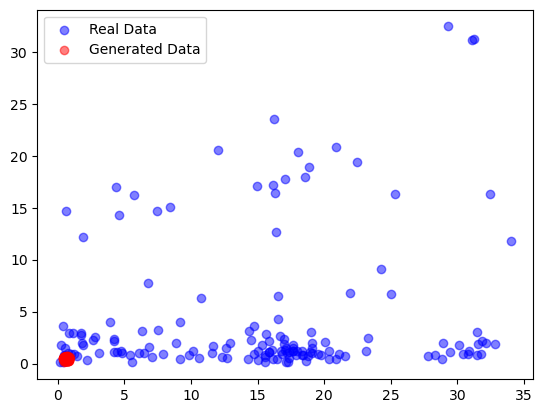

In [24]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
plt.legend()
plt.show()

# Stratifying/Splitting Train Equally


In [22]:
df = pd.read_csv("TestDataCompiled.csv")
df.columns = ['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade", "Normal"]
display(df)
df["Normal"].value_counts()

y = df.Normal
X = df.drop('Normal', axis=1)



,AmplitudePrimary,AmplitudeSecondary,Latency,CorrectiveSaccade,Normal
0,7.905335,0.907229,0.124998,7,0
1,17.381435,0.563108,0.341670,13,0
2,29.415535,1.097195,0.308346,16,0
3,10.173487,1.182019,0.175026,9,0
4,6.801426,7.733378,0.391700,28,0
...,...,...,...,...,...
187,3.948713,3.948713,0.033335,16,1
188,14.329194,3.160185,0.125025,6,1
189,19.042962,3.035957,0.525034,5,1
190,1.762336,2.942543,0.325038,15,1


In [23]:
# 
print(y.shape)
print(y.value_counts())


train_y_count = int(0.8*55)
arr_0 = y[y==0].index
arr_1 = y[y==1].index

indicies_0_train = np.random.choice(arr_0, size=train_y_count, replace=False)
indicies_1_train = np.random.choice(arr_1, size=train_y_count, replace=False)
concatenated_array = np.concatenate((indicies_0_train, indicies_1_train), axis=0)

X_train = X.iloc[concatenated_array]
y_train = y.iloc[concatenated_array]
X_test = X.drop(concatenated_array)
y_test = y.drop(concatenated_array)

print(X_train.shape)
print(X_test.shape)


(192,)
Normal
0    137
1     55
Name: count, dtype: int64
(88, 4)
(104, 4)


## No Data Augmentation

### Random Forest

In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.5352941176470589


In [25]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 200, min_samples_leaf = 1, min_samples_split = 5)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5192307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.51      0.65        93
           1       0.13      0.64      0.22        11

    accuracy                           0.52       104
   macro avg       0.53      0.57      0.44       104
weighted avg       0.84      0.52      0.61       104



## Data Augmentation: Gaussian Noise

In [29]:
def add_gaussian_noise(X, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=X.shape)
    return X + noise
# Example: Adding Gaussian noise with mean=0 and std=0.1
X_with_gaussian_noise = add_gaussian_noise(X)
X_augmented = pd.concat([X, X_with_gaussian_noise])
y_augmented = pd.concat([y,y])
# X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)

train_y_count = int(0.8*55)
arr_0 = y_augmented[y_augmented==0].index
arr_1 = y_augmented[y_augmented==1].index

indicies_0_train = np.random.choice(arr_0, size=train_y_count, replace=False)
indicies_1_train = np.random.choice(arr_1, size=train_y_count, replace=False)
concatenated_array = np.concatenate((indicies_0_train, indicies_1_train), axis=0)

X_train = X_augmented.iloc[concatenated_array]
y_train = y_augmented.iloc[concatenated_array]
X_test = X_augmented.drop(concatenated_array)
y_test = y_augmented.drop(concatenated_array)

### SVM

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 0.1}
Best Score: 0.6712418300653595


In [31]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 0.1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5504201680672269
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       190
           1       0.16      0.29      0.21        48

    accuracy                           0.55       238
   macro avg       0.47      0.45      0.45       238
weighted avg       0.65      0.55      0.59       238



### Random Forest

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7509803921568627


In [33]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 100, min_samples_leaf = 2, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5798319327731093
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       190
           1       0.22      0.44      0.30        48

    accuracy                           0.58       238
   macro avg       0.52      0.53      0.50       238
weighted avg       0.69      0.58      0.62       238



## Data Augmentation: Jittering

In [34]:
def add_jittering(X, magnitude=0.1):
    jitter = np.random.uniform(-magnitude, magnitude, size=X.shape)
    return X + jitter

# Example: Adding jittering with magnitude=0.1
X_with_jittering = add_jittering(X)
X_augmented = pd.concat([X, X_with_jittering])
y_augmented = pd.concat([y,y])
# X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)

train_y_count = int(0.8*55)
arr_0 = y_augmented[y_augmented==0].index
arr_1 = y_augmented[y_augmented==1].index

indicies_0_train = np.random.choice(arr_0, size=train_y_count, replace=False)
indicies_1_train = np.random.choice(arr_1, size=train_y_count, replace=False)
concatenated_array = np.concatenate((indicies_0_train, indicies_1_train), axis=0)

X_train = X_augmented.iloc[concatenated_array]
y_train = y_augmented.iloc[concatenated_array]
X_test = X_augmented.drop(concatenated_array)
y_test = y_augmented.drop(concatenated_array)

### SVM

In [35]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 1}
Best Score: 0.6464052287581699


In [36]:
model = SVC(kernel='rbf', random_state=42, C = 1, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7920353982300885
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       188
           1       0.00      0.00      0.00        38

    accuracy                           0.79       226
   macro avg       0.41      0.48      0.44       226
weighted avg       0.69      0.79      0.74       226



### RF

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.6372549019607844


In [38]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5265486725663717
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       188
           1       0.18      0.53      0.27        38

    accuracy                           0.53       226
   macro avg       0.51      0.53      0.46       226
weighted avg       0.73      0.53      0.59       226

